In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузка CSV
data = pd.read_csv('Raisin_essential.csv', sep=';')

# Признаки и метки
X = data[['Area', 'Eccentricity', 'Extent']].values
y = data['Class'].values

# Преобразование категориальных меток в числа
le = LabelEncoder()
y = le.fit_transform(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
import datetime

# Функция для создания модели с настраиваемыми гиперпараметрами
def create_model(hidden_layers=[32, 16], activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=X_train.shape[1], activation=activation))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))  # бинарная классификация
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [4]:
# Пример гиперпараметров
hidden_layers = [64, 32]
activation = 'relu'
dropout_rate = 0.2
epochs = 50
batch_size = 16

model = create_model(hidden_layers, activation, dropout_rate)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[tensorboard_callback],
    verbose=1
)

Epoch 1/50


/Users/ilavoronin/Учеба/СИИиМО/myenv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7083 - loss: 0.6408 - val_accuracy: 0.8750 - val_loss: 0.5468
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4983 - val_accuracy: 0.8889 - val_loss: 0.3962
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.4149 - val_accuracy: 0.9028 - val_loss: 0.3279
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3846 - val_accuracy: 0.9028 - val_loss: 0.3055
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3746 - val_accuracy: 0.9028 - val_loss: 0.2929
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3642 - val_accuracy: 0.9028 - val_loss: 0.2892
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3611 - val_accuracy: 0.9028 - val_loss: 0.2863
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3618 - val_accuracy: 0.9028 - val_loss: 0.2868
Epo

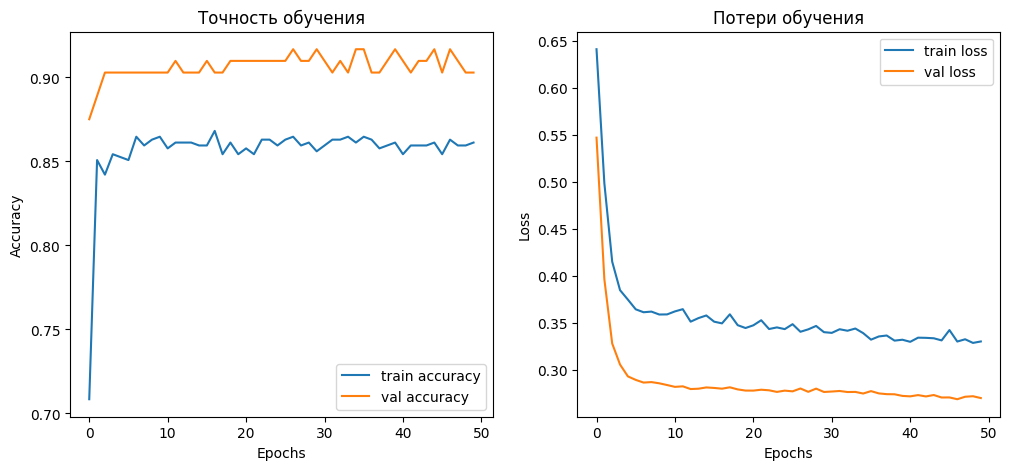

In [5]:
import matplotlib.pyplot as plt

# График точности
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Точность обучения')

# График потерь
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Потери обучения')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import itertools
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import datetime
import os

# =========================================================
# 1️⃣ Подготовка данных
# =========================================================

data = pd.read_csv('dataset.csv', sep=';')

X = data[['Area', 'Eccentricity', 'Extent']].values
y = data['Class'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================================================
# 2️⃣ Функция для создания модели
# =========================================================

def create_model(hidden_layers=[32, 16], activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=X_train.shape[1], activation=activation))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # бинарная классификация
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# =========================================================
# 3️⃣ Настройка сетки гиперпараметров
# =========================================================

param_grid = {
    'hidden_layers': [[32, 16], [64, 32], [128, 64, 32]],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2],
    'batch_size': [8, 16],
    'epochs': [50]
}

# Все комбинации параметров
param_combinations = list(itertools.product(
    param_grid['hidden_layers'],
    param_grid['activation'],
    param_grid['dropout_rate'],
    param_grid['batch_size'],
    param_grid['epochs']
))

results = []

# =========================================================
# 4️⃣ Цикл перебора моделей
# =========================================================

for i, (hidden_layers, activation, dropout_rate, batch_size, epochs) in enumerate(param_combinations):
    print(f"\n🔹 Модель {i+1}/{len(param_combinations)}: "
          f"Layers={hidden_layers}, Act={activation}, Drop={dropout_rate}, Batch={batch_size}")

    # Уникальная папка логов
    log_dir = os.path.join(
        "logs/fit/",
        f"model_{i+1}_{activation}_drop{dropout_rate}_layers{'-'.join(map(str, hidden_layers))}_{datetime.datetime.now().strftime('%H%M%S')}"
    )
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    model = create_model(hidden_layers, activation, dropout_rate)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[tensorboard_callback],
        verbose=0
    )

    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    results.append({
        'model_id': i+1,
        'hidden_layers': hidden_layers,
        'activation': activation,
        'dropout_rate': dropout_rate,
        'batch_size': batch_size,
        'epochs': epochs,
        'val_accuracy': val_acc,
        'val_loss': val_loss
    })

# =========================================================
# 5️⃣ Результаты всех моделей
# =========================================================

results_df = pd.DataFrame(results).sort_values(by='val_accuracy', ascending=False)
print("\n✅ РЕЗУЛЬТАТЫ ВСЕХ МОДЕЛЕЙ (по валидационной точности):")
print(results_df)

# =========================================================
# 6️⃣ Графики (топ-3 модели)
# =========================================================

top_models = results_df.head(3)
plt.figure(figsize=(10, 5))
plt.barh(
    [f"{r.activation}, {r.hidden_layers}, drop={r.dropout_rate}" for _, r in top_models.iterrows()],
    top_models['val_accuracy']
)
plt.xlabel("Validation Accuracy")
plt.title("Топ-3 моделей по точности")
plt.gca().invert_yaxis()
plt.show()